In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

____
## Part 1: Getting the Data

### Tesla Stock (Ticker: TSLA on the NASDAQ)





In [2]:
import pandas_datareader
import datetime

In [3]:
import pandas_datareader.data as web

In [4]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2021, 1, 1)
tesla = web.DataReader("TSLA", 'yahoo', start, end)

In [5]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500.0,5.616
2012-01-04,5.734,5.500,5.642,5.542,3150500.0,5.542
2012-01-05,5.586,5.370,5.552,5.424,5027500.0,5.424
2012-01-06,5.558,5.282,5.440,5.382,4931500.0,5.382
2012-01-09,5.498,5.224,5.400,5.450,4485000.0,5.450


In [6]:
tesla.to_csv('Tesla_Stock.csv')

### Other Car Companies

** Repeat the same steps to grab data for Ford and GM (General Motors), **

In [7]:
ford = web.DataReader("F", 'yahoo', start, end)
gm = web.DataReader("GM",'yahoo',start,end)

In [8]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.544740
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.659981
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.856563
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.937905
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.998916


In [9]:
ford.to_csv('Ford_Stock.csv')

In [10]:
gm.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,42.200001,41.209999,42.060001,41.580002,7825400.0,41.580002
2020-12-28,42.189999,41.630001,42.000000,41.660000,10471400.0,41.660000
2020-12-29,42.130001,41.369999,41.889999,41.570000,7987700.0,41.570000
2020-12-30,42.200001,41.570000,41.650002,41.840000,6491900.0,41.840000
2020-12-31,41.799999,41.200001,41.759998,41.639999,11101300.0,41.639999


In [11]:
gm.to_csv('GM_Stock.csv')

## Part 2: Visualizing the Data



____



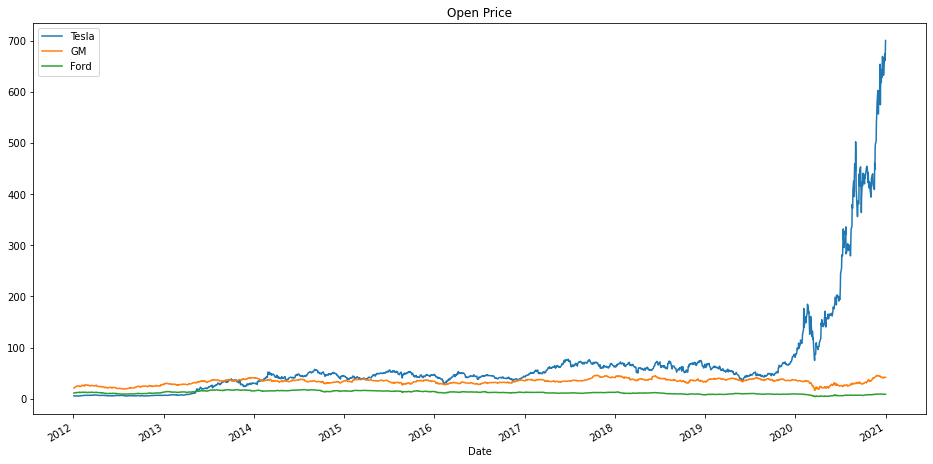

In [12]:
tesla['Open'].plot(label='Tesla',figsize=(16,8),title='Open Price')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend()

** Plot the Volume of stock traded each day.**

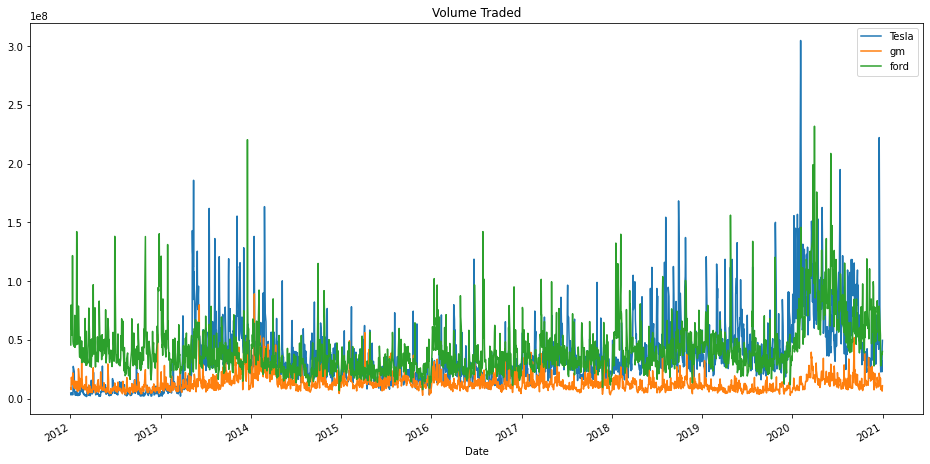

In [13]:
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume Traded')
gm['Volume'].plot(label='gm')
ford['Volume'].plot(label='ford')
plt.legend()

In [14]:
ford['Volume'].argmax()

2073

____

Getting market capital

In [15]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']

** Plot this "Total Traded" against the time index.**

Text(0, 0.5, 'Total Traded')

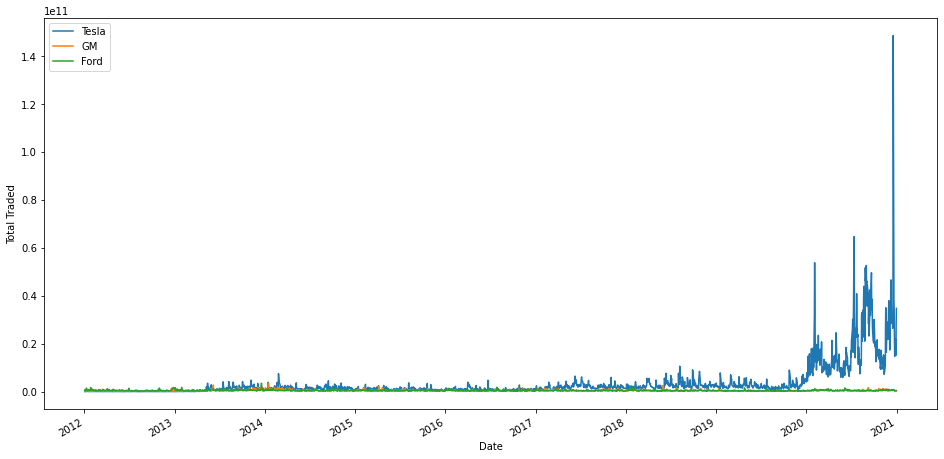

In [16]:
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend()
plt.ylabel('Total Traded')

In [17]:
tesla['Total Traded'].argmax()

2256

____

<AxesSubplot:xlabel='Date'>

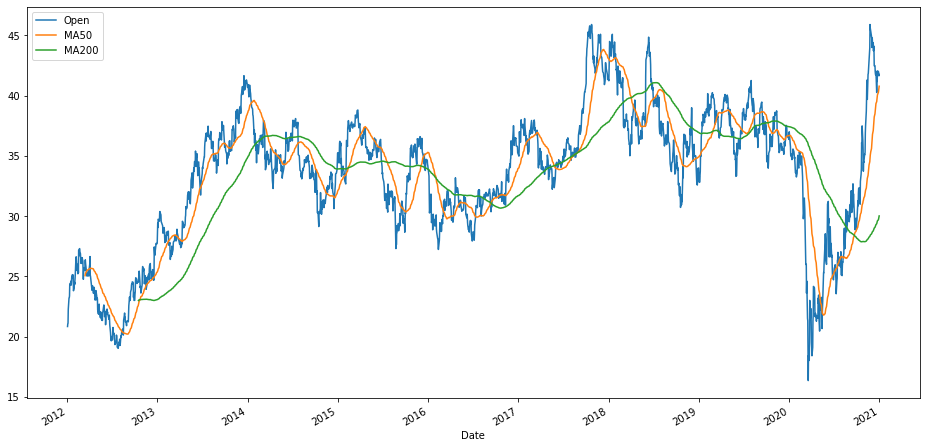

In [18]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open','MA50','MA200']].plot(label='gm',figsize=(16,8))

______

In [19]:
from pandas.plotting import scatter_matrix

In [20]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)

In [21]:
car_comp.columns = ['Tesla Open','GM Open','Ford Open']

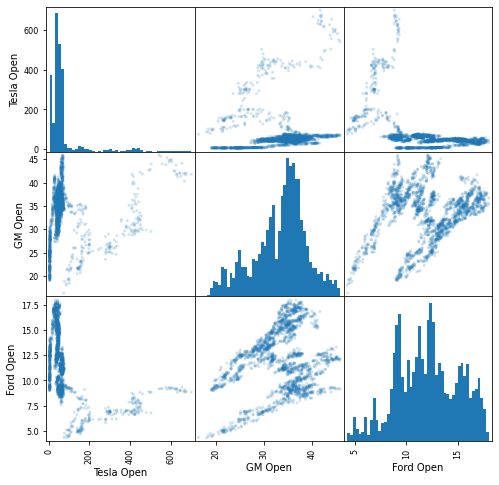

In [22]:
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

In [23]:
# !pip install mplfinance

## Daily Percentage Change
First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

In [24]:
# Method 1: Using shift
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1) ) - 1

In [25]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500.0,5.616,2.685921e+07,NaN
2012-01-04,5.734,5.500,5.642,5.542,3150500.0,5.542,1.777512e+07,-0.013177
2012-01-05,5.586,5.370,5.552,5.424,5027500.0,5.424,2.791268e+07,-0.021292
2012-01-06,5.558,5.282,5.440,5.382,4931500.0,5.382,2.682736e+07,-0.007743
2012-01-09,5.498,5.224,5.400,5.450,4485000.0,5.450,2.421900e+07,0.012635


In [26]:
tesla['returns'] = tesla['Close'].pct_change(1)

In [27]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500.0,5.616,2.685921e+07,NaN
2012-01-04,5.734,5.500,5.642,5.542,3150500.0,5.542,1.777512e+07,-0.013177
2012-01-05,5.586,5.370,5.552,5.424,5027500.0,5.424,2.791268e+07,-0.021292
2012-01-06,5.558,5.282,5.440,5.382,4931500.0,5.382,2.682736e+07,-0.007743
2012-01-09,5.498,5.224,5.400,5.450,4485000.0,5.450,2.421900e+07,0.012635


In [28]:
# Now repeat for the other dataframes
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

In [29]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.544740,5.028089e+08,NaN
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.659981,8.889359e+08,0.015274
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.856563,7.690521e+08,0.025664
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.937905,7.025298e+08,0.010354
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.998916,6.386011e+08,0.007686


In [30]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.269407,1.941627e+08,NaN,NaN,NaN
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.346703,1.653835e+08,NaN,NaN,0.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.135054,3.772807e+08,NaN,NaN,0.048227
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.714725,4.059000e+08,NaN,NaN,0.033829
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.652889,2.803604e+08,NaN,NaN,-0.003490


<AxesSubplot:>

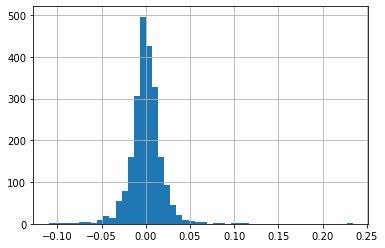

In [31]:
ford['returns'].hist(bins=50)

<AxesSubplot:>

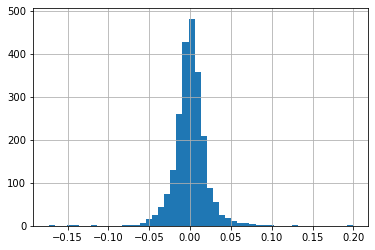

In [32]:
gm['returns'].hist(bins=50)

<AxesSubplot:>

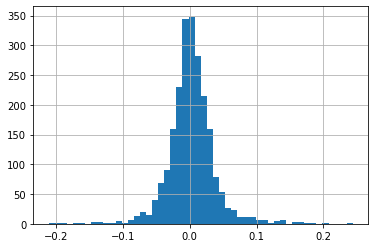

In [33]:
tesla['returns'].hist(bins=50)

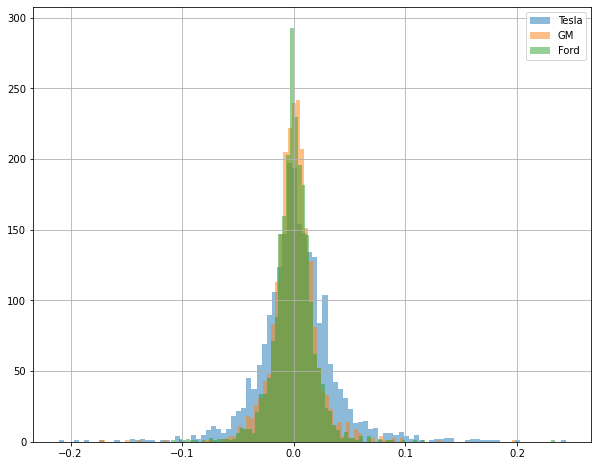

In [34]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.5)
gm['returns'].hist(bins=100,label='GM',alpha=0.5)
ford['returns'].hist(bins=100,label='Ford',alpha=0.5)
plt.legend()

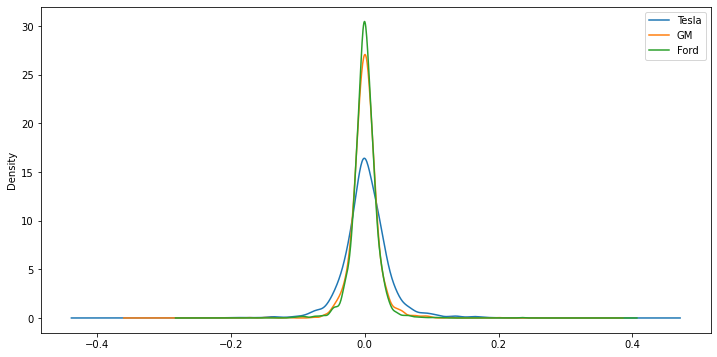

In [35]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(12,6))
gm['returns'].plot(kind='kde',label='GM')
ford['returns'].plot(kind='kde',label='Ford')
plt.legend()

<AxesSubplot:>

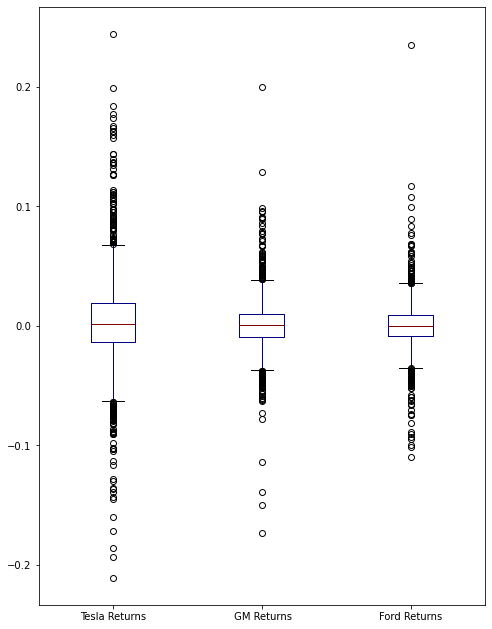

In [36]:
box_df = pd.concat([tesla['returns'],gm['returns'],ford['returns']],axis=1)
box_df.columns = ['Tesla Returns',' GM Returns','Ford Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

## Comparing Daily Returns between Stocks


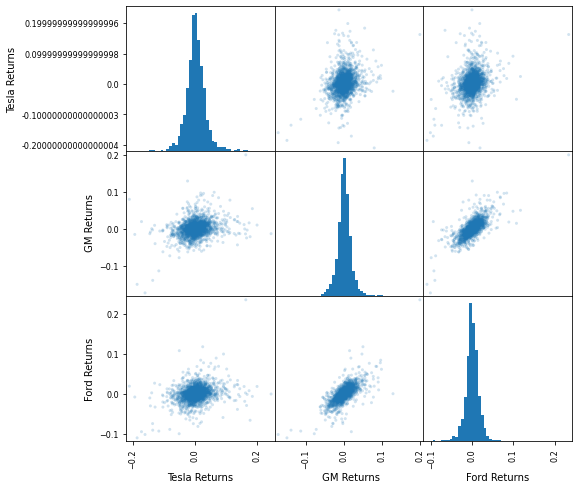

In [37]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

<AxesSubplot:xlabel=' GM Returns', ylabel='Ford Returns'>

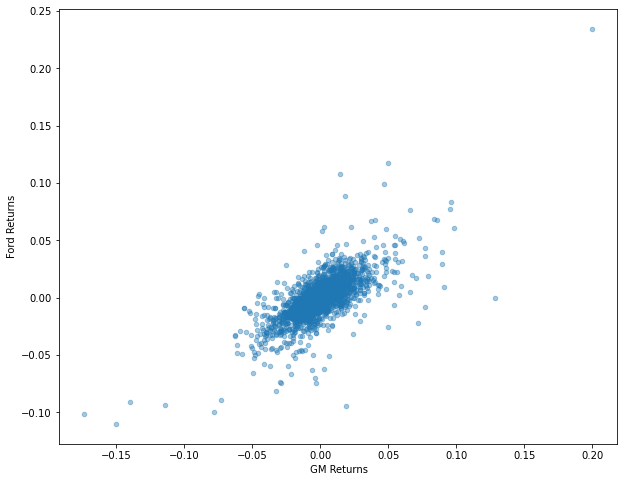

In [38]:
box_df.plot(kind='scatter',x=' GM Returns',y='Ford Returns',alpha=0.4,figsize=(10,8))

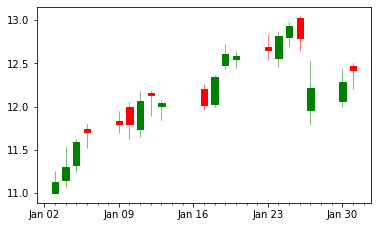

In [71]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

# Rest the index to get a column of January Dates
ford_reset = ford.loc['2012-01':'2012-01'].reset_index()

# Create a new column of numerical "date" values for matplotlib to use
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))
ford_values = [tuple(vals) for vals in ford_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

#Plot it
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, ford_values, width=0.6, colorup='g',colordown='r');

____
## Cumulative Daily Returns

In [40]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()

In [41]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500.0,5.616,2.685921e+07,NaN,NaN
2012-01-04,5.734,5.500,5.642,5.542,3150500.0,5.542,1.777512e+07,-0.013177,0.986823
2012-01-05,5.586,5.370,5.552,5.424,5027500.0,5.424,2.791268e+07,-0.021292,0.965812
2012-01-06,5.558,5.282,5.440,5.382,4931500.0,5.382,2.682736e+07,-0.007743,0.958333
2012-01-09,5.498,5.224,5.400,5.450,4485000.0,5.450,2.421900e+07,0.012635,0.970442


In [42]:
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

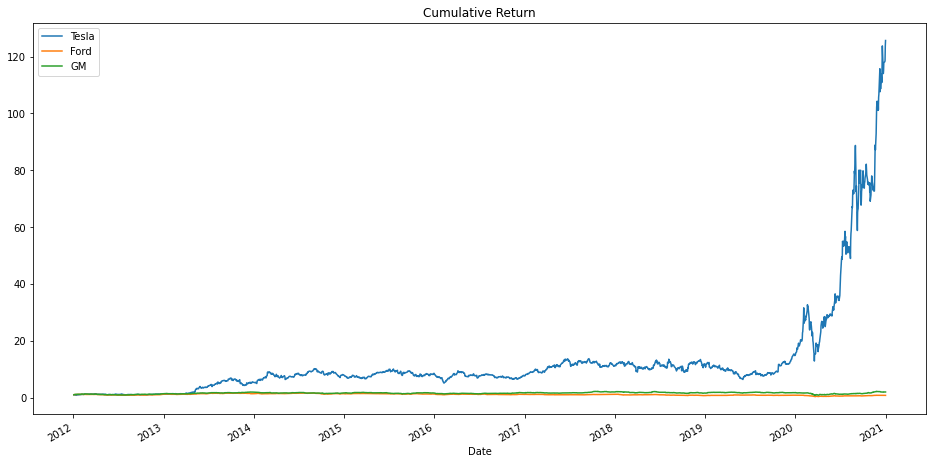

In [43]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()

In [44]:
tesla

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2012-01-03,5.900000,5.530000,5.78800,5.616000,4640500.0,5.616000,2.685921e+07,NaN,NaN
2012-01-04,5.734000,5.500000,5.64200,5.542000,3150500.0,5.542000,1.777512e+07,-0.013177,0.986823
2012-01-05,5.586000,5.370000,5.55200,5.424000,5027500.0,5.424000,2.791268e+07,-0.021292,0.965812
2012-01-06,5.558000,5.282000,5.44000,5.382000,4931500.0,5.382000,2.682736e+07,-0.007743,0.958333
2012-01-09,5.498000,5.224000,5.40000,5.450000,4485000.0,5.450000,2.421900e+07,0.012635,0.970442
...,...,...,...,...,...,...,...,...,...
2020-12-24,666.090027,641.000000,642.98999,661.770020,22865600.0,661.770020,1.470235e+10,0.024444,117.836538
2020-12-28,681.400024,660.799988,674.51001,663.690002,32278600.0,663.690002,2.177224e+10,0.002901,118.178416
2020-12-29,669.900024,655.000000,661.00000,665.989990,22910800.0,665.989990,1.514404e+10,0.003465,118.587958


# Linear regression

In [45]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2021, 1, 1)
tesla = web.DataReader("TSLA", 'yahoo', start, end)

In [46]:
tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900000,5.530000,5.78800,5.616000,4640500.0,5.616000
2012-01-04,5.734000,5.500000,5.64200,5.542000,3150500.0,5.542000
2012-01-05,5.586000,5.370000,5.55200,5.424000,5027500.0,5.424000
2012-01-06,5.558000,5.282000,5.44000,5.382000,4931500.0,5.382000
2012-01-09,5.498000,5.224000,5.40000,5.450000,4485000.0,5.450000
...,...,...,...,...,...,...
2020-12-24,666.090027,641.000000,642.98999,661.770020,22865600.0,661.770020
2020-12-28,681.400024,660.799988,674.51001,663.690002,32278600.0,663.690002
2020-12-29,669.900024,655.000000,661.00000,665.989990,22910800.0,665.989990


In [47]:
tesla.dropna(inplace=True)
tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900000,5.530000,5.78800,5.616000,4640500.0,5.616000
2012-01-04,5.734000,5.500000,5.64200,5.542000,3150500.0,5.542000
2012-01-05,5.586000,5.370000,5.55200,5.424000,5027500.0,5.424000
2012-01-06,5.558000,5.282000,5.44000,5.382000,4931500.0,5.382000
2012-01-09,5.498000,5.224000,5.40000,5.450000,4485000.0,5.450000
...,...,...,...,...,...,...
2020-12-24,666.090027,641.000000,642.98999,661.770020,22865600.0,661.770020
2020-12-28,681.400024,660.799988,674.51001,663.690002,32278600.0,663.690002
2020-12-29,669.900024,655.000000,661.00000,665.989990,22910800.0,665.989990


In [48]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['High', 'Low', 'Open', 'Volume', 'Adj Close','Close']
tesla[num_vars] = scaler.fit_transform(tesla[num_vars])

tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,0.000743,0.001459,0.000668,0.001509,0.009298,0.001509
2012-01-04,0.000510,0.001416,0.000458,0.001403,0.004378,0.001403
2012-01-05,0.000303,0.001226,0.000328,0.001235,0.010576,0.001235
2012-01-06,0.000264,0.001098,0.000167,0.001175,0.010259,0.001175
2012-01-09,0.000179,0.001014,0.000109,0.001272,0.008784,0.001272
...,...,...,...,...,...,...
2020-12-24,0.926221,0.927002,0.917946,0.937385,0.069472,0.937385
2020-12-28,0.947684,0.955840,0.963321,0.940124,0.100552,0.940124
2020-12-29,0.931562,0.947392,0.943872,0.943404,0.069622,0.943404


In [49]:
X = tesla.iloc[:, [0,1,2,4]].values
y = tesla.iloc[:, 3].values

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8)

In [52]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [53]:
y_train=y_train.astype('float')
y_test=y_test.astype('float')
X_train=X_train.astype('float')
X_test=X_test.astype('float')

In [54]:
model.fit(X_train,y_train)

LinearRegression()

In [55]:
y_preds = model.predict(X_test)



In [56]:
print(y_test[:4])
print(y_preds[:4])



[0.02336004 0.04952418 0.05339518 0.05999327]
[0.02352408 0.048974   0.05295828 0.05987867]


In [57]:
y_test.mean()

0.09393974416444334

In [58]:
y_preds.mean()

0.09381728342313488

# NAIVE BAYES

In [59]:
tesla['Change'] = tesla['Open']-tesla['Close']


In [60]:
tesla['Change'][tesla['Change'] <= 0] = 0
tesla['Change'][tesla['Change'] > 0] = 1



In [61]:
tesla

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2012-01-03,0.000743,0.001459,0.000668,0.001509,0.009298,0.001509,0.0
2012-01-04,0.000510,0.001416,0.000458,0.001403,0.004378,0.001403,0.0
2012-01-05,0.000303,0.001226,0.000328,0.001235,0.010576,0.001235,0.0
2012-01-06,0.000264,0.001098,0.000167,0.001175,0.010259,0.001175,0.0
2012-01-09,0.000179,0.001014,0.000109,0.001272,0.008784,0.001272,0.0
...,...,...,...,...,...,...,...
2020-12-24,0.926221,0.927002,0.917946,0.937385,0.069472,0.937385,0.0
2020-12-28,0.947684,0.955840,0.963321,0.940124,0.100552,0.940124,1.0
2020-12-29,0.931562,0.947392,0.943872,0.943404,0.069622,0.943404,1.0


In [62]:
nb=tesla.drop(['Change','Close'],axis='columns')

In [63]:
nb1 = tesla.Change

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(nb,nb1,test_size=0.8)

In [65]:
y_train=y_train.astype('float')
y_test=y_test.astype('int')
X_train=X_train.astype('float')
X_test=X_test.astype('int')

In [66]:

from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()

In [67]:
model2.fit(X_train,y_train)

GaussianNB()

In [68]:
y_preds = model2.predict(X_test)

In [69]:
y_preds

array([0., 0., 0., ..., 0., 0., 0.])

In [70]:
acc=accuracy_score(y_test,y_preds)
acc

0.6799116997792495